In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import ortho_group


E = np.array([[2,1], [4,6], [-2, 1], [5, -3]])
#T = ortho_group.rvs(dim=2) generate a random unitary matrix
angle = np.pi / 3 # assume the ideal angle between the languages is 60 degrees
T = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
F = (E @ T) # French vectors are simply rotated by angle

[[ 0.5       -0.8660254]
 [ 0.8660254  0.5      ]]


(-2.472674876180873, 7.729039783310882, -6.5661818088987545, 6.61284351512994)

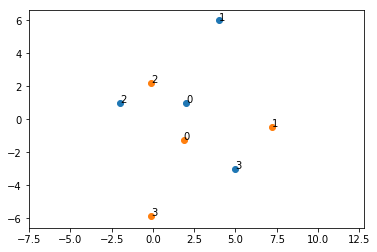

In [2]:
plt.scatter(E[:,0], E[:,1])
for i,e in enumerate(E):
    plt.annotate(i, (e[0], e[1]))
plt.scatter(F[:,0], F[:,1])
for i,f in enumerate(F):
    plt.annotate(i, (f[0], f[1]))
print(T)
plt.axis('equal')

Knowing the embeddings of the pivot elements, we can guess the transformation between the two representations relying on the pseudoinverse of $E$.

In [3]:
pinv_trafo = lambda src, tgt: np.linalg.pinv(src) @ tgt

def ortho_trafo(src, tgt):
    U,S,V = np.linalg.svd(src.T @ tgt)
    return np.dot(U, V)

In [4]:
print(pinv_trafo(F, E))
print(ortho_trafo(F, E))

[[ 0.5        0.8660254]
 [-0.8660254  0.5      ]]
[[ 0.5        0.8660254]
 [-0.8660254  0.5      ]]


[Pseudoinverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse) of any matrix $X$ simply equals $(X^T X) X^T$.

In [5]:
def pinv_calc(X):
    return np.linalg.inv(X.T@X)@X.T

def calc_residuum(X, Y):
    return np.linalg.norm(X-Y, 'fro')

Indeed, our calculation gives us nearly (up to some numerical error) the same result as invoking `np.linalg.pinv`

In [6]:
print(calc_residuum(pinv_calc(E), np.linalg.pinv(E)))

9.60385280722898e-17


In [7]:
print(calc_residuum(E, F))

9.797958971132712


In [8]:
print(calc_residuum(E, F@pinv_trafo(F, E)))
print(calc_residuum(E, F@ortho_trafo(F, E)))

1.6050308076832566e-15
1.6946818973100072e-15


## What happens if we have noisy pivot elements as well?

In [9]:
F[-1,:] += [-3, -1]

[[ 0.5       -0.8660254]
 [ 0.8660254  0.5      ]]


(-3.688878006746399, 7.786954218099717, -7.616181808898755, 6.662843515129941)

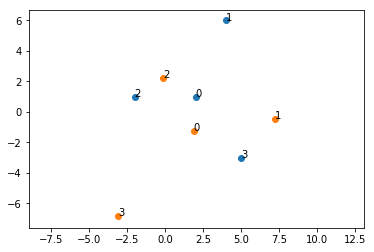

In [10]:
plt.scatter(E[:,0], E[:,1])
for i,e in enumerate(E):
    plt.annotate(i, (e[0], e[1]))
plt.scatter(F[:,0], F[:,1])
for i,f in enumerate(F):
    plt.annotate(i, (f[0], f[1]))
print(T)
plt.axis('equal')

Let's see the overall reconstruction error for the source vectors.

In [11]:
pinv_F = F@pinv_trafo(F, E)
ortho_F = F@ortho_trafo(F, E)
print('Pseudoinverse: ', calc_residuum(E, pinv_F)**2)
print('Orthogonal: ', calc_residuum(E, ortho_F)**2)

Pseudoinverse:  1.039987316628092
Orthogonal:  7.0591721359321395


Now check the individual recostruction errors for the individual vectors:

In [12]:
pinv_delta_sum, ortho_delta_sum = 0,0
for i, (e, pinv_f, ortho_f) in enumerate(zip(E, pinv_F, ortho_F)):
    pinv_delta_squared = sum((e - pinv_f)**2)
    pinv_delta_sum += pinv_delta_squared
    ortho_delta_squared = sum((e - ortho_f)**2)
    ortho_delta_sum += ortho_delta_squared
    print(i, pinv_delta_squared, ortho_delta_squared)
print("Aggregated squared differences:", pinv_delta_sum, ortho_delta_sum)    

0 0.13356610656303503 0.14193901274399928
1 0.06366109917201139 1.4761657325375968
2 0.7346027490183159 0.1419390127439994
3 0.10815736187472992 5.299128377906546
Aggregated squared differences: 1.0399873166280924 7.059172135932141


(-2.6035008823095973,
 5.371458738037954,
 -3.9328542354346907,
 6.487446964012604)

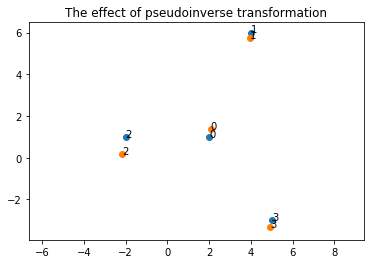

In [13]:
plt.scatter(E[:,0], E[:,1])
for i,e in enumerate(E):
    plt.annotate(i, (e[0], e[1]))
plt.scatter(pinv_F[:,0], pinv_F[:,1])
for i,f in enumerate(pinv_F):
    plt.annotate(i, (f[0], f[1]))
plt.title('The effect of pseudoinverse transformation')
plt.axis('equal')

(-2.588957804584726, 5.777305215715537, -6.02247233671863, 7.33034236549028)

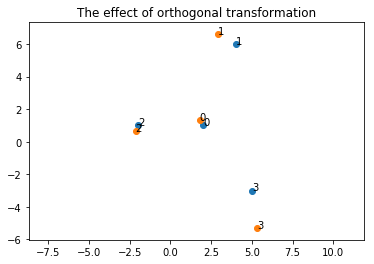

In [14]:
plt.scatter(E[:,0], E[:,1])
for i,e in enumerate(E):
    plt.annotate(i, (e[0], e[1]))
plt.scatter(ortho_F[:,0], ortho_F[:,1])
for i,f in enumerate(ortho_F):
    plt.annotate(i, (f[0], f[1]))
plt.title('The effect of orthogonal transformation')
plt.axis('equal')